In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("/home/artur/ml_shared/week5/factions_data.csv")

In [4]:
df.head()

,Object_class,Point,battles_won,Position X,Position Y,Position Z,faction,income,size,social_class
0,0,0,13,-6.449495,0.0,0.474881,0,562.923828,1181.510620,medium
1,1,1,5,-6.067698,0.0,1.980191,0,252.193863,1175.865967,medium
2,2,2,21,-5.068211,0.0,-1.932505,0,170.149155,610.696533,low
3,3,3,10,-1.932827,0.0,-1.078261,0,446.785339,312.987732,medium
4,4,4,30,3.587147,0.0,5.261977,1,251.686218,783.760864,medium


In [5]:
df.drop(["Object_class", "Point", "Position Y"], inplace=True, axis=1)

In [6]:
df.head()

,battles_won,Position X,Position Z,faction,income,size,social_class
0,13,-6.449495,0.474881,0,562.923828,1181.510620,medium
1,5,-6.067698,1.980191,0,252.193863,1175.865967,medium
2,21,-5.068211,-1.932505,0,170.149155,610.696533,low
3,10,-1.932827,-1.078261,0,446.785339,312.987732,medium
4,30,3.587147,5.261977,1,251.686218,783.760864,medium


In [7]:
df['social_class'] = df['social_class'].map({'medium': 0.5, 'low': 0, 'high': 1})

In [8]:
df.head()

,battles_won,Position X,Position Z,faction,income,size,social_class
0,13,-6.449495,0.474881,0,562.923828,1181.510620,0.5
1,5,-6.067698,1.980191,0,252.193863,1175.865967,0.5
2,21,-5.068211,-1.932505,0,170.149155,610.696533,0.0
3,10,-1.932827,-1.078261,0,446.785339,312.987732,0.5
4,30,3.587147,5.261977,1,251.686218,783.760864,0.5


In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop(["faction", "social_class"], axis=1))

StandardScaler()

In [13]:
scaled_feature = scaler.transform(df.drop(["faction", "social_class"], axis=1))

In [14]:
scaled_feature

array([[-0.92009838, -1.34742664, -0.15970549, -0.44262938,  0.45716273],
       [-1.47031217, -1.24597606,  0.42491428, -0.46615563,  0.44508929],
       [-0.36988458, -0.98039385, -1.09466629, -0.47236747, -0.76376085],
       [-1.12642855, -0.14726455, -0.76290218, -0.45142256, -1.40053507],
       [ 0.24910594,  1.31949396,  1.69946735, -0.46619407, -0.39359072],
       [ 0.52421284,  1.68225915,  0.85516193, -0.4555614 ,  1.39568512],
       [-1.33275873, -0.8474723 , -0.21756112, -0.45972356,  0.2792546 ],
       [ 1.28075681,  0.40678496,  0.12103795, -0.43124156,  0.42799989],
       [ 1.76219388,  1.87364338,  1.2957248 , -0.4711224 ,  1.38674016],
       [-0.78254493, -1.28610766, -0.16272046, -0.43679845,  1.4689652 ],
       [ 0.38665939,  1.49473814,  0.36427902, -0.46100205, -1.26330702],
       [-1.33275873, -1.12881528, -1.74591863, -0.48076984, -0.83798767],
       [-0.16355441, -1.42236077, -0.89220172, -0.41098543,  1.31317679],
       [ 1.83097061,  1.42253505, -0.0

In [18]:
df_features_scaled = pd.DataFrame(scaled_feature, columns=df.drop(["faction", "social_class"], axis=1).columns)

In [25]:
df_features_scaled.head() 

,battles_won,Position X,Position Z,income,size,social_class
0,-0.920098,-1.347427,-0.159705,-0.442629,0.457163,0.5
1,-1.470312,-1.245976,0.424914,-0.466156,0.445089,0.5
2,-0.369885,-0.980394,-1.094666,-0.472367,-0.763761,0.0
3,-1.126429,-0.147265,-0.762902,-0.451423,-1.400535,0.5
4,0.249106,1.319494,1.699467,-0.466194,-0.393591,0.5


In [22]:
df_features_scaled["social_class"] = df["social_class"]

In [23]:
df_features_scaled.head()

,battles_won,Position X,Position Z,income,size,social_class
0,-0.920098,-1.347427,-0.159705,-0.442629,0.457163,0.5
1,-1.470312,-1.245976,0.424914,-0.466156,0.445089,0.5
2,-0.369885,-0.980394,-1.094666,-0.472367,-0.763761,0.0
3,-1.126429,-0.147265,-0.762902,-0.451423,-1.400535,0.5
4,0.249106,1.319494,1.699467,-0.466194,-0.393591,0.5


In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X = df_features_scaled
y = df["faction"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
K = 9
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [30]:
y_predict = knn.predict(X_test)

In [32]:
print(confusion_matrix(y_test, y_predict))

[[9 0]
 [0 8]]


In [33]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [40]:
error_rate = []

limit = 66

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

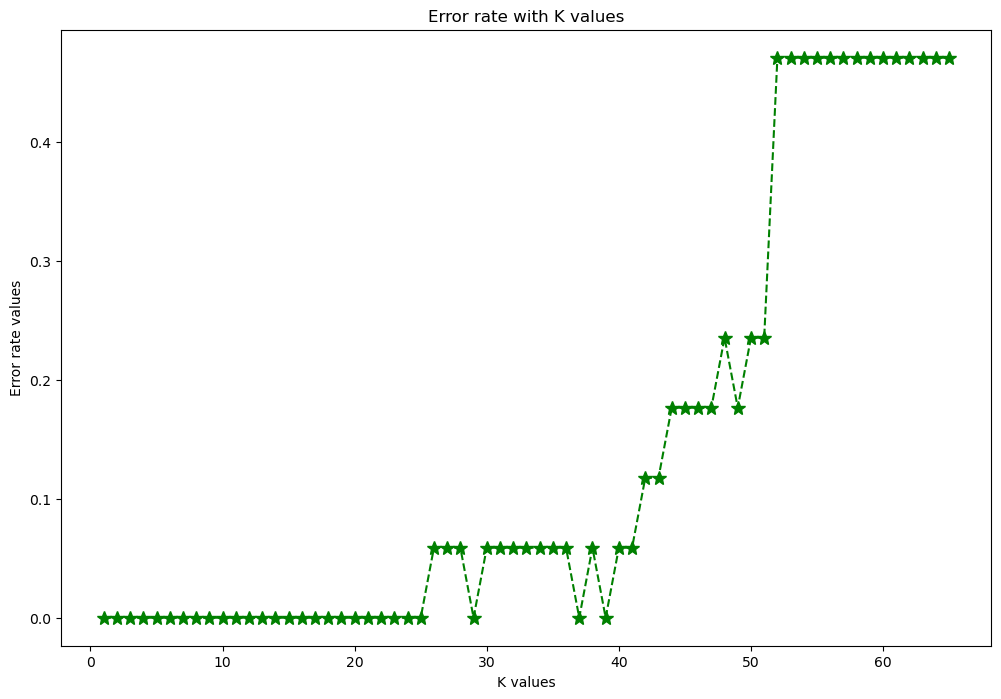

In [41]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit),error_rate, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [42]:
y_predict

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [43]:
import pickle

In [45]:
with open("knn_hou_model.pkl", "wb") as file:
    pickle.dump(knn, file)